In [171]:
!pip install yfinance
import yfinance as yf


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [172]:
data = yf.download(tickers="MSFT")

data

/tmp/ipykernel_6532/2319925096.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers="MSFT")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200
1986-03-18,0.061194,0.063323,0.060662,0.062791,67766400
1986-03-19,0.060130,0.061726,0.059598,0.061194,47894400
...,...,...,...,...,...
2025-06-02,461.970001,462.109985,456.890015,457.140015,16626500
2025-06-03,462.970001,464.140015,460.859985,461.470001,15743800


In [173]:
data.to_csv('/workspaces/Python_repository/MFST.CSV')

In [174]:
df_raw = pd.read_csv('/workspaces/Python_repository/MFST.CSV')
print(df_raw.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [175]:
MS = yf.download(tickers="MFST", group_by='ticker', auto_adjust=True)
df = yf.download("MSFT", group_by='ticker', auto_adjust=True)

MS

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MFST']: YFTzMissingError('possibly delisted; no timezone found')


[*********************100%***********************]  1 of 1 completed


Empty DataFrame
Columns: [(MFST, Open), (MFST, High), (MFST, Low), (MFST, Close), (MFST, Adj Close), (MFST, Volume)]
Index: []

In [176]:
import yfinance as yf

df = yf.download("MSFT", group_by='ticker', auto_adjust=True)

df

[*********************100%***********************]  1 of 1 completed


Ticker            MSFT                                                
Price             Open        High         Low       Close      Volume
Date                                                                  
1986-03-13    0.054277    0.062259    0.054277    0.059598  1031788800
1986-03-14    0.059598    0.062791    0.059598    0.061726   308160000
1986-03-17    0.061726    0.063323    0.061726    0.062791   133171200
1986-03-18    0.062791    0.063323    0.060662    0.061194    67766400
1986-03-19    0.061194    0.061726    0.059598    0.060130    47894400
...                ...         ...         ...         ...         ...
2025-06-02  457.140015  462.109985  456.890015  461.970001    16626500
2025-06-03  461.470001  464.140015  460.859985  462.970001    15743800
2025-06-04  464.000000  465.690002  463.019989  463.869995    14162700
2025-06-05  464.959991  469.649994  464.029999  467.679993    20131700
2025-06-06  470.089996  473.339996  468.779999  470.380005    15278600

[9886 rows x 5 columns]

In [177]:
df_ms = df.loc['2016-12-08':,:]

df_ms

Ticker            MSFT                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2016-12-08   55.341823   55.594610   54.926535   55.080009  21220800
2016-12-09   55.233478   55.964750   55.188339   55.946693  27349400
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100
2016-12-13   56.425183   57.255760   56.190456   56.858528  35718900
2016-12-14   56.876593   57.282855   56.452274   56.587696  30352700
...                ...         ...         ...         ...       ...
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600

[2135 rows x 5 columns]

### Calculate the percentage daily difference for tomorrow

In [178]:
df_ms.MSFT.Close.pct_change() * 100

Date
2016-12-08         NaN
2016-12-09    1.573500
2016-12-12    0.322745
2016-12-13    1.302878
2016-12-14   -0.476326
                ...   
2025-06-02    0.349730
2025-06-03    0.216464
2025-06-04    0.194396
2025-06-05    0.821350
2025-06-06    0.577320
Name: Close, Length: 2135, dtype: float64

In [179]:
df_ms.MSFT.Close.pct_change(-1) * 100

Date
2016-12-08   -1.549125
2016-12-09   -0.321706
2016-12-12   -1.286122
2016-12-13    0.478606
2016-12-14    0.159799
                ...   
2025-06-02   -0.215997
2025-06-03   -0.194019
2025-06-04   -0.814659
2025-06-05   -0.574007
2025-06-06         NaN
Name: Close, Length: 2135, dtype: float64

In [180]:
df_ms['MSFT','Ch_tomorrow'] = df_ms.MSFT.Close.pct_change(-1) * 100 * -1

/tmp/ipykernel_6532/2377680742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['MSFT','Ch_tomorrow'] = df_ms.MSFT.Close.pct_change(-1) * 100 * -1


In [181]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341823   55.594610   54.926535   55.080009  21220800   
2016-12-09   55.233478   55.964750   55.188339   55.946693  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425183   57.255760   56.190456   56.858528  35718900   
2016-12-14   56.876593   57.282855   56.452274   56.587696  30352700   
...                ...         ...         ...         ...       ...   
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   
2025-06-06  470.089996  473.339996  468.779999  470.380005  15278600   

Ticker                  
Price      Ch_tomorrow  
Date                    
2016-12-08    1.549125  
2016-12-09    0.321706  
2016-12-12    1.286122  
2016-12-13   -0.478606  
2016-12-14   -0.159799  
...                ...  
2025-06-02    0.215997  
2025-06-03    0.194019  
2025-06-04    0.814659  
2025-06-05    0.574007  
2025-06-06         NaN  

[2135 rows x 6 columns]

In [182]:
df_ms = df_ms.dropna().copy()

In [183]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341823   55.594610   54.926535   55.080009  21220800   
2016-12-09   55.233478   55.964750   55.188339   55.946693  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425183   57.255760   56.190456   56.858528  35718900   
2016-12-14   56.876593   57.282855   56.452274   56.587696  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  459.720001  461.679993  455.540009  460.359985  34770500   
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   

Ticker                  
Price      Ch_tomorrow  
Date                    
2016-12-08    1.549125  
2016-12-09    0.321706  
2016-12-12    1.286122  
2016-12-13   -0.478606  
2016-12-14   -0.159799  
...                ...  
2025-05-30    0.348511  
2025-06-02    0.215997  
2025-06-03    0.194019  
2025-06-04    0.814659  
2025-06-05    0.574007  

[2134 rows x 6 columns]

### Did the stock go up or down

In [184]:
import numpy as np

df_ms['MSFT','Ch_dir'] = np.where(df_ms.MSFT.Ch_tomorrow > 0, 'UP', 'DOWN')

In [185]:
df_ms

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-12-08   55.341823   55.594610   54.926535   55.080009  21220800   
2016-12-09   55.233478   55.964750   55.188339   55.946693  27349400   
2016-12-12   55.811279   56.244624   55.721000   56.127258  20198100   
2016-12-13   56.425183   57.255760   56.190456   56.858528  35718900   
2016-12-14   56.876593   57.282855   56.452274   56.587696  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  459.720001  461.679993  455.540009  460.359985  34770500   
2025-06-02  457.140015  462.109985  456.890015  461.970001  16626500   
2025-06-03  461.470001  464.140015  460.859985  462.970001  15743800   
2025-06-04  464.000000  465.690002  463.019989  463.869995  14162700   
2025-06-05  464.959991  469.649994  464.029999  467.679993  20131700   

Ticker                         
Price      Ch_tomorrow Ch_dir  
Date                           
2016-12-08    1.549125     UP  
2016-12-09    0.321706     UP  
2016-12-12    1.286122     UP  
2016-12-13   -0.478606   DOWN  
2016-12-14   -0.159799   DOWN  
...                ...    ...  
2025-05-30    0.348511     UP  
2025-06-02    0.215997     UP  
2025-06-03    0.194019     UP  
2025-06-04    0.814659     UP  
2025-06-05    0.574007     UP  

[2134 rows x 7 columns]

In [186]:
df_ms.MSFT.Ch_dir.value_counts()

Ch_dir
UP      1155
DOWN     979
Name: count, dtype: int64

<Axes: xlabel='Date'>

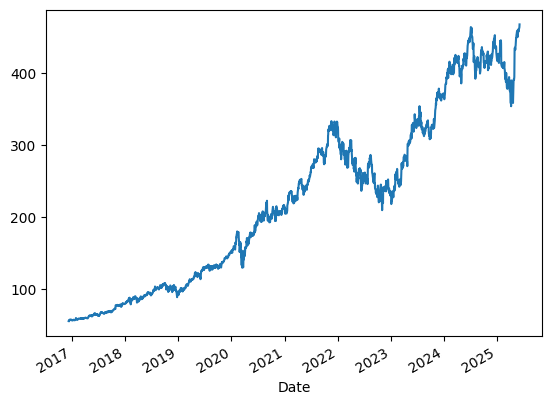

In [187]:
df_ms.MSFT.Close.plot()

### Machine Learning Classification Model

In [188]:
df_ms

df_ms.columns

df.columns = ['_'.join(col) 
              for col in df.columns]



In [189]:
df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume
Date,,,,,
1986-03-13,0.054277,0.062259,0.054277,0.059598,1031788800
1986-03-14,0.059598,0.062791,0.059598,0.061726,308160000
1986-03-17,0.061726,0.063323,0.061726,0.062791,133171200
1986-03-18,0.062791,0.063323,0.060662,0.061194,67766400
1986-03-19,0.061194,0.061726,0.059598,0.060130,47894400
...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700


In [190]:
df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume
Date,,,,,
1986-03-13,0.054277,0.062259,0.054277,0.059598,1031788800
1986-03-14,0.059598,0.062791,0.059598,0.061726,308160000
1986-03-17,0.061726,0.063323,0.061726,0.062791,133171200
1986-03-18,0.062791,0.063323,0.060662,0.061194,67766400
1986-03-19,0.061194,0.061726,0.059598,0.060130,47894400
...,...,...,...,...,...
2025-06-02,457.140015,462.109985,456.890015,461.970001,16626500
2025-06-03,461.470001,464.140015,460.859985,462.970001,15743800
2025-06-04,464.000000,465.690002,463.019989,463.869995,14162700


In [203]:
target = df_ms.MSFT.Ch_dir

target

Date
2016-12-08      UP
2016-12-09      UP
2016-12-12      UP
2016-12-13    DOWN
2016-12-14    DOWN
              ... 
2025-05-30      UP
2025-06-02      UP
2025-06-03      UP
2025-06-04      UP
2025-06-05      UP
Name: Ch_dir, Length: 2134, dtype: object

In [204]:
explanatory = df_ms.drop([('MSFT', 'Ch_tomorrow'), ('MSFT', 'Ch_dir')], axis=1)

In [205]:
explanatory


explanatory.columns = ['_'.join(col) 
              for col in explanatory.columns]


In [206]:
print(target.dtypes)


object


In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
model_df = DecisionTreeClassifier()

In [209]:
model_df.fit(X = explanatory, y = target)

DecisionTreeClassifier()

### Visualize the model

[Text(0.5491161819490148, 0.9880952380952381, 'MSFT_Close <= 224.427\ngini = 0.497\nsamples = 2134\nvalue = [979, 1155]'),
 Text(0.4602945937817555, 0.9642857142857143, 'MSFT_Close <= 215.929\ngini = 0.491\nsamples = 1068\nvalue = [461, 607]'),
 Text(0.5047053878653851, 0.9761904761904763, 'True  '),
 Text(0.3829055772738995, 0.9404761904761905, 'MSFT_Volume <= 44742700.0\ngini = 0.493\nsamples = 1030\nvalue = [452, 578]'),
 Text(0.28392314546430414, 0.9166666666666666, 'MSFT_Volume <= 32050200.0\ngini = 0.489\nsamples = 918\nvalue = [390, 528]'),
 Text(0.16565299890118354, 0.8928571428571429, 'MSFT_Low <= 205.982\ngini = 0.495\nsamples = 739\nvalue = [333, 406]'),
 Text(0.12271036486613472, 0.8690476190476191, 'MSFT_Volume <= 31751600.0\ngini = 0.493\nsamples = 722\nvalue = [319, 403]'),
 Text(0.11973459946847516, 0.8452380952380952, 'MSFT_High <= 59.215\ngini = 0.492\nsamples = 716\nvalue = [313, 403]'),
 Text(0.03682509679603704, 0.8214285714285714, 'MSFT_Close <= 58.538\ngini = 0.4

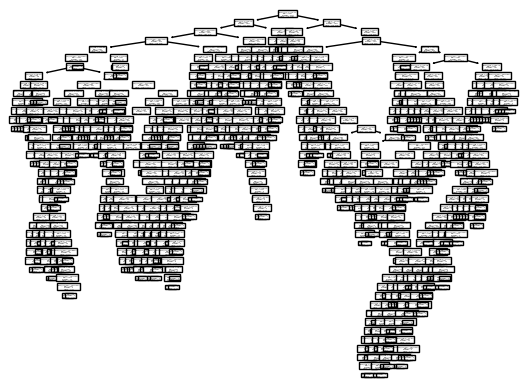

In [210]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_df, feature_names=model_df.feature_names_in_)

### Calculate the predictions

In [211]:
y_pred = model_df.predict(X = explanatory)

In [212]:
df_pred = df_ms[('MSFT', 'Ch_dir')].to_frame()
df_pred['MSFT', 'Pred'] = y_pred
df_pred

MSFT      
           Ch_dir  Pred
Date                   
2016-12-08     UP    UP
2016-12-09     UP    UP
2016-12-12     UP    UP
2016-12-13   DOWN  DOWN
2016-12-14   DOWN  DOWN
...           ...   ...
2025-05-30     UP    UP
2025-06-02     UP    UP
2025-06-03     UP    UP
2025-06-04     UP    UP
2025-06-05     UP    UP

[2134 rows x 2 columns]

### Evaluate the model: compare prediction with reality

In [213]:
comp = df_pred.MSFT.Ch_dir == df_pred.MSFT.Pred

print(comp)


Date
2016-12-08    True
2016-12-09    True
2016-12-12    True
2016-12-13    True
2016-12-14    True
              ... 
2025-05-30    True
2025-06-02    True
2025-06-03    True
2025-06-04    True
2025-06-05    True
Length: 2134, dtype: bool


In [218]:
comp.sum()/len(comp)

np.float64(1.0)

In [219]:
model_df.score(X=explanatory, y = target)

1.0

### Create Pickle file

In [220]:
import pickle

In [221]:
model_df

DecisionTreeClassifier()

In [222]:
with open('model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_df, f)